In [ ]:
# ======================================================================
#   MAT 531 – Multivariable Mathematics for Machine Learning
#   Gradient Descent Lab – Extra Credit Assignment
#
#   Title: Gradient Descent in 1D and Model Fitting Using GD
#   Student: Nikita S. Karim
#   Instructor: Professor Rocca
#   Fall 2025
# ======================================================================

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline


In [17]:
# Function and derivative
def f(x):
    return 3*x**4 + 4*x**3 - 39*x**2 + 1

def df(x):
    return 12*x**3 + 12*x**2 - 72*x

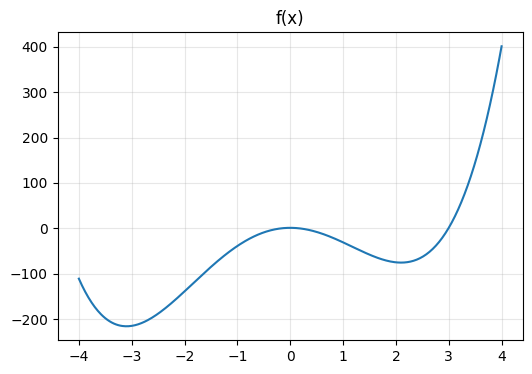

In [18]:
xs = np.linspace(-4, 4, 400)
plt.figure(figsize=(6,4))
plt.plot(xs, f(xs))
plt.grid(True, alpha=0.3)
plt.title("f(x)")
plt.show()


In [19]:
def run_gd_1d(x0, dx, n_steps=500):
    xVals = [x0]
    yVals = [f(x0)]
    temp_x = x0

    for _ in range(n_steps):
        new_x = temp_x - dx * df(temp_x)
        new_y = f(new_x)

        if new_x == temp_x:
            dx += dx
        elif new_y > yVals[-1]:
            temp_x = new_x
            dx *= 0.9
        else:
            temp_x = new_x
            dx *= 1.01
            xVals.append(temp_x)
            yVals.append(new_y)

    return np.array(xVals), np.array(yVals)


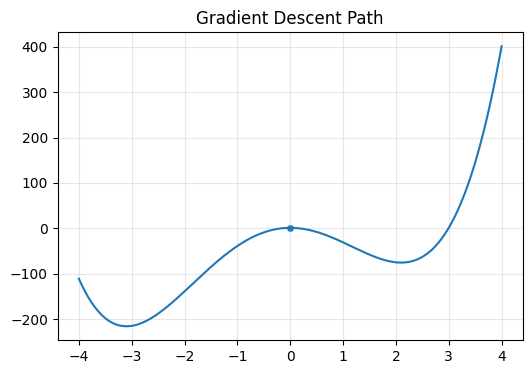

In [20]:
xs_gd, ys_gd = run_gd_1d(0.0, 1e-2)

plt.figure(figsize=(6,4))
plt.plot(xs, f(xs))
plt.scatter(xs_gd, ys_gd, s=15)
plt.title("Gradient Descent Path")
plt.grid(True, alpha=0.3)
plt.show()


In [21]:
for dx in [1e-1, 1e-2, 1e-3]:
    xs_dx, ys_dx = run_gd_1d(0.0, dx)
    print(dx, xs_dx[-1], ys_dx[-1])


0.1 0.0 1.0
0.01 0.0 1.0
0.001 0.0 1.0


In [22]:
x0_rand = -4 + 8*np.random.rand()
xs_r, ys_r = run_gd_1d(x0_rand, 1e-2)
print("x0:", x0_rand, "final:", xs_r[-1], ys_r[-1])


x0: -0.8363886936177325 final: -3.092020653589453 -215.89452319217514


In [30]:
df = pd.read_csv("../data/alcohol_calories.csv")
df.head()


,Alcohol,oz,calories
0,Beer (light),12.0,103
1,Beer (regular),12.0,153
2,"Beer (higher alcohol, craft beers)",12.0,260
3,Gin (80 proof),1.5,97
4,Gin (94 proof),1.5,116


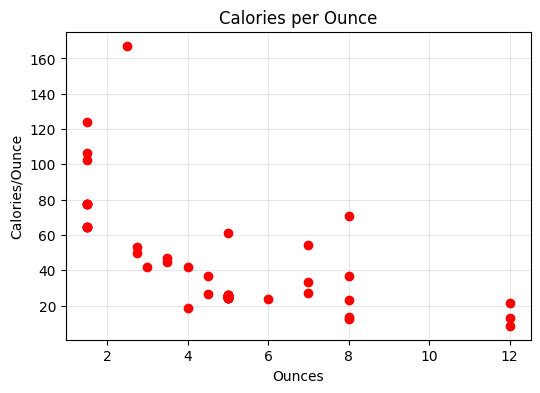

In [31]:
# use the numeric columns directly
oz  = df["oz"].astype(float).to_numpy()
cal = df["calories"].astype(float).to_numpy()

Y = cal / oz
X = oz

# sort
idx = np.argsort(X)
X = X[idx]
Y = Y[idx]

plt.figure(figsize=(6,4))
plt.plot(X, Y, "ro")
plt.grid(True, alpha=0.3)
plt.title("Calories per Ounce")
plt.xlabel("Ounces")
plt.ylabel("Calories/Ounce")
plt.show()


Index(['oz', 'calories'], dtype='object') (52, 2)


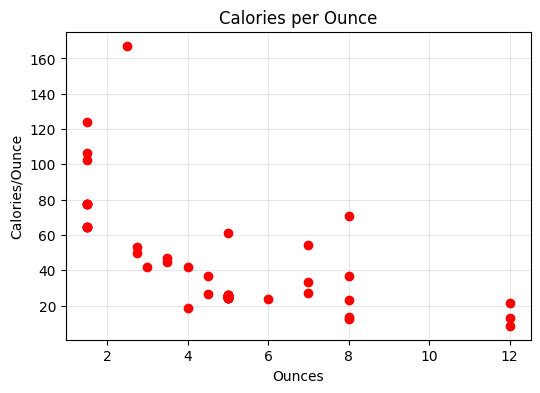

In [32]:
# use only numeric columns (ounces, calories)
num = df.select_dtypes(include="number")

print(num.columns, num.shape)  # quick check

oz  = num.iloc[:, 0].to_numpy()
cal = num.iloc[:, 1].to_numpy()

Y = cal / oz
X = oz

# sort
idx = np.argsort(X)
X = X[idx]
Y = Y[idx]

plt.figure(figsize=(6,4))
plt.plot(X, Y, "ro")
plt.grid(True, alpha=0.3)
plt.title("Calories per Ounce")
plt.xlabel("Ounces")
plt.ylabel("Calories/Ounce")
plt.show()


In [33]:
def arb_linear(x, a, b):
    return a*x + b

def arb_quad(x, a, b, c):
    return a*(x-b)**2 + c

# Find coefficients
lcoef, _ = curve_fit(arb_linear, X, Y)
qcoef, _ = curve_fit(arb_quad, X, Y)

lcoef, qcoef


(array([-7.21347546, 78.48637416]),
 array([ 1.17012957,  9.09068304, 14.1006923 ]))

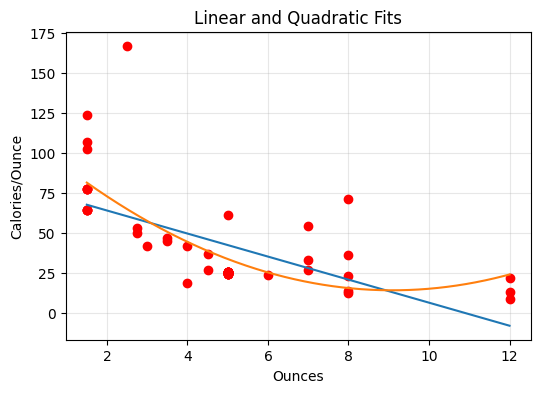

In [34]:
xg = np.linspace(min(X), max(X), 400)

plt.figure(figsize=(6,4))
plt.plot(X, Y, "ro")
plt.plot(xg, arb_linear(xg, *lcoef))
plt.plot(xg, arb_quad(xg, *qcoef))
plt.grid(True, alpha=0.3)
plt.title("Linear and Quadratic Fits")
plt.xlabel("Ounces")
plt.ylabel("Calories/Ounce")
plt.show()


In [35]:
def exp_no_const(x, a, b):
    return b * np.exp(a*x)

def exp_with_const(x, a, b, c):
    return c + b * np.exp(a*x)

ecoef1, _ = curve_fit(exp_no_const, X, Y, p0=[-0.1, 50])
ecoef2, _ = curve_fit(exp_with_const, X, Y, p0=[-0.1, 50, 0])

ecoef1, ecoef2


(array([ -0.2596537 , 122.71828791]),
 array([ -0.47353038, 134.00738544,  19.42239374]))

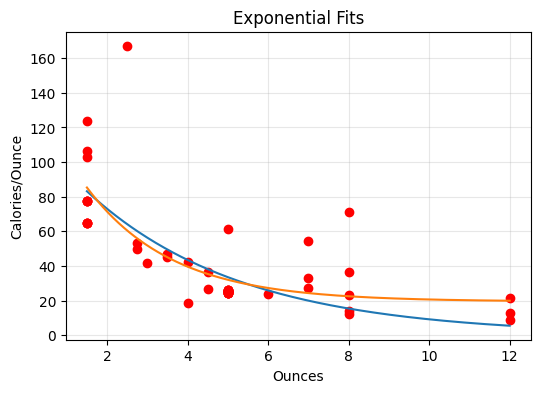

In [36]:
plt.figure(figsize=(6,4))
plt.plot(X, Y, "ro")
plt.plot(xg, exp_no_const(xg, *ecoef1))
plt.plot(xg, exp_with_const(xg, *ecoef2))
plt.grid(True, alpha=0.3)
plt.title("Exponential Fits")
plt.xlabel("Ounces")
plt.ylabel("Calories/Ounce")
plt.show()


In [37]:
def C1(X, Y, a, b):
    z = b * np.exp(a*X)
    return np.mean((z - Y)**2)

def C1_da(X, Y, a, b):
    z = b * np.exp(a*X)
    return np.mean(2*(z - Y) * (b*np.exp(a*X)) * X)

def C1_db(X, Y, a, b):
    z = b * np.exp(a*X)
    return np.mean(2*(z - Y) * np.exp(a*X))


In [38]:
# Initial values
a = ecoef1[0]
b = ecoef1[1]
dt = 1e-2

for _ in range(200000):
    da = C1_da(X, Y, a, b)
    db = C1_db(X, Y, a, b)

    new_a = a - dt*da
    new_b = b - dt*db

    if C1(X, Y, new_a, new_b) < C1(X, Y, a, b):
        a, b = new_a, new_b
        dt *= 1.1
    else:
        dt *= 0.9

a, b


(np.float64(-0.2596540185476459), np.float64(122.71828797522426))

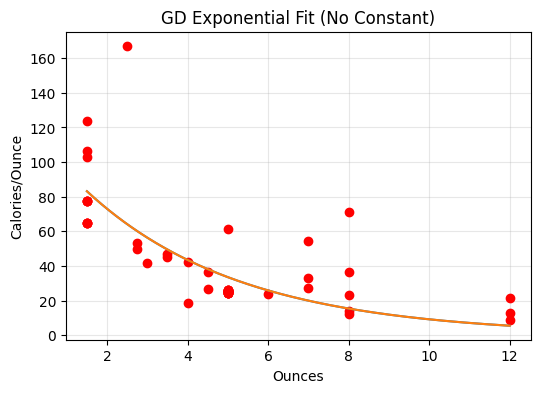

In [39]:
plt.figure(figsize=(6,4))
plt.plot(X, Y, "ro")
plt.plot(xg, exp_no_const(xg, *ecoef1))
plt.plot(xg, exp_no_const(xg, a, b))
plt.grid(True, alpha=0.3)
plt.title("GD Exponential Fit (No Constant)")
plt.xlabel("Ounces")
plt.ylabel("Calories/Ounce")
plt.show()


In [40]:
def C2(X, Y, a, b, c):
    z = c + b*np.exp(a*X)
    return np.mean((z - Y)**2)

def C2_da(X, Y, a, b, c):
    z = c + b*np.exp(a*X)
    return np.mean(2*(z - Y) * (b*np.exp(a*X)) * X)

def C2_db(X, Y, a, b, c):
    z = c + b*np.exp(a*X)
    return np.mean(2*(z - Y) * np.exp(a*X))

def C2_dc(X, Y, a, b, c):
    z = c + b*np.exp(a*X)
    return np.mean(2*(z - Y))


In [41]:
a2, b2, c2 = ecoef2
dt = 1e-2

for _ in range(200000):
    da = C2_da(X, Y, a2, b2, c2)
    db = C2_db(X, Y, a2, b2, c2)
    dc = C2_dc(X, Y, a2, b2, c2)

    new_a = a2 - dt*da
    new_b = b2 - dt*db
    new_c = c2 - dt*dc

    if C2(X, Y, new_a, new_b, new_c) < C2(X, Y, a2, b2, c2):
        a2, b2, c2 = new_a, new_b, new_c
        dt *= 1.1
    else:
        dt *= 0.9

a2, b2, c2


(np.float64(-0.4735109733714334),
 np.float64(134.00584089010908),
 np.float64(19.421393078768592))

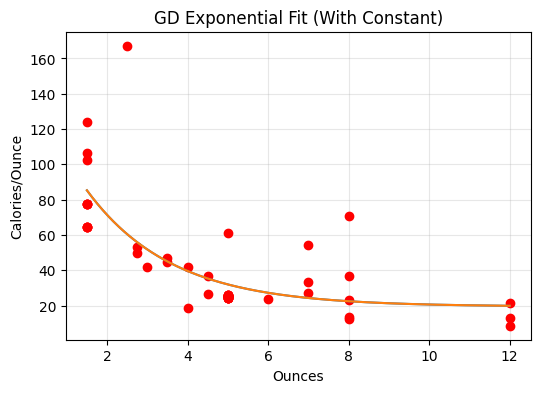

In [42]:
plt.figure(figsize=(6,4))
plt.plot(X, Y, "ro")
plt.plot(xg, exp_with_const(xg, *ecoef2))
plt.plot(xg, exp_with_const(xg, a2, b2, c2))
plt.grid(True, alpha=0.3)
plt.title("GD Exponential Fit (With Constant)")
plt.xlabel("Ounces")
plt.ylabel("Calories/Ounce")
plt.show()
